In [1]:
import torch
from transformers import GPT2LMHeadModel

In [2]:
model_hf = GPT2LMHeadModel.from_pretrained('gpt2')
print(f'{sum(p.numel() for p in model_hf.parameters()) /1000000:.4f} M params')

124.4398 M params


In [3]:
type(model_hf.state_dict())

collections.OrderedDict

In [4]:
print(model_hf.state_dict().keys())

odict_keys(['transformer.wte.weight', 'transformer.wpe.weight', 'transformer.h.0.ln_1.weight', 'transformer.h.0.ln_1.bias', 'transformer.h.0.attn.c_attn.weight', 'transformer.h.0.attn.c_attn.bias', 'transformer.h.0.attn.c_proj.weight', 'transformer.h.0.attn.c_proj.bias', 'transformer.h.0.ln_2.weight', 'transformer.h.0.ln_2.bias', 'transformer.h.0.mlp.c_fc.weight', 'transformer.h.0.mlp.c_fc.bias', 'transformer.h.0.mlp.c_proj.weight', 'transformer.h.0.mlp.c_proj.bias', 'transformer.h.1.ln_1.weight', 'transformer.h.1.ln_1.bias', 'transformer.h.1.attn.c_attn.weight', 'transformer.h.1.attn.c_attn.bias', 'transformer.h.1.attn.c_proj.weight', 'transformer.h.1.attn.c_proj.bias', 'transformer.h.1.ln_2.weight', 'transformer.h.1.ln_2.bias', 'transformer.h.1.mlp.c_fc.weight', 'transformer.h.1.mlp.c_fc.bias', 'transformer.h.1.mlp.c_proj.weight', 'transformer.h.1.mlp.c_proj.bias', 'transformer.h.2.ln_1.weight', 'transformer.h.2.ln_1.bias', 'transformer.h.2.attn.c_attn.weight', 'transformer.h.2.attn.

In [5]:
sd_hf = model_hf.state_dict()
for k,v in sd_hf.items():
    print(k, '--', v.shape)

transformer.wte.weight -- torch.Size([50257, 768])
transformer.wpe.weight -- torch.Size([1024, 768])
transformer.h.0.ln_1.weight -- torch.Size([768])
transformer.h.0.ln_1.bias -- torch.Size([768])
transformer.h.0.attn.c_attn.weight -- torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias -- torch.Size([2304])
transformer.h.0.attn.c_proj.weight -- torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias -- torch.Size([768])
transformer.h.0.ln_2.weight -- torch.Size([768])
transformer.h.0.ln_2.bias -- torch.Size([768])
transformer.h.0.mlp.c_fc.weight -- torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias -- torch.Size([3072])
transformer.h.0.mlp.c_proj.weight -- torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias -- torch.Size([768])
transformer.h.1.ln_1.weight -- torch.Size([768])
transformer.h.1.ln_1.bias -- torch.Size([768])
transformer.h.1.attn.c_attn.weight -- torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias -- torch.Size([2304])
transformer.h.1.attn.c_proj.weight --

In [6]:
sd_hf['transformer.wte.weight'].shape
sd_hf['transformer.wte.weight']

tensor([[-0.1101, -0.0393,  0.0331,  ..., -0.1364,  0.0151,  0.0453],
        [ 0.0403, -0.0486,  0.0462,  ...,  0.0861,  0.0025,  0.0432],
        [-0.1275,  0.0479,  0.1841,  ...,  0.0899, -0.1297, -0.0879],
        ...,
        [-0.0445, -0.0548,  0.0123,  ...,  0.1044,  0.0978, -0.0695],
        [ 0.1860,  0.0167,  0.0461,  ..., -0.0963,  0.0785, -0.0225],
        [ 0.0514, -0.0277,  0.0499,  ...,  0.0070,  0.1552,  0.1207]])

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

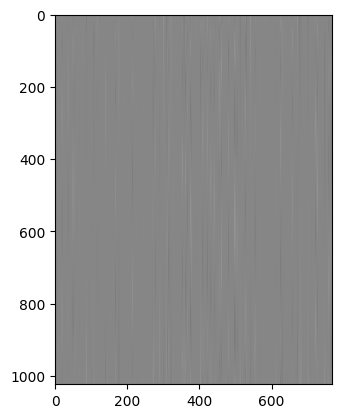

In [8]:
plt.imshow(sd_hf['transformer.wpe.weight'], cmap='gray');

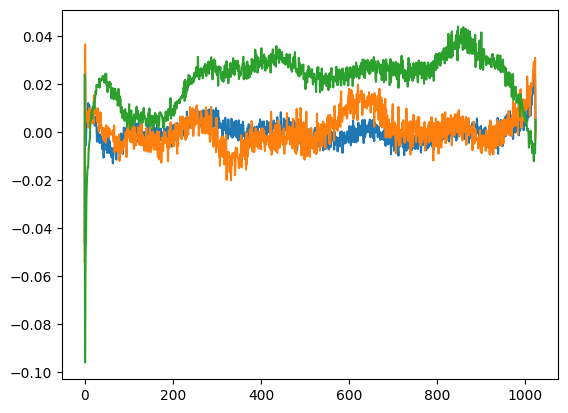

In [9]:
plt.plot(sd_hf['transformer.wpe.weight'][:, 150])
plt.plot(sd_hf['transformer.wpe.weight'][:, 200])
plt.plot(sd_hf['transformer.wpe.weight'][:, 250])

In [11]:
import tiktoken
enc = tiktoken.get_encoding('gpt2')
tokens = enc.encode("Hello, I'm a language model,")
tokens = torch.tensor(tokens, dtype=torch.long)
tokens.shape

torch.Size([8])

In [16]:
tokens.unsqueeze(0).repeat(5,1)

tensor([[15496,    11,   314,  1101,   257,  3303,  2746,    11],
        [15496,    11,   314,  1101,   257,  3303,  2746,    11],
        [15496,    11,   314,  1101,   257,  3303,  2746,    11],
        [15496,    11,   314,  1101,   257,  3303,  2746,    11],
        [15496,    11,   314,  1101,   257,  3303,  2746,    11]])

In [33]:
probs = torch.nn.functional.softmax(torch.randn(5,65), dim=-1)
topk, topk_indices = torch.topk(probs, 50, dim=-1)
topk_indices[0]

tensor([45, 39, 33,  4, 11, 41, 44, 46, 54,  9, 21, 32, 47, 48, 52, 55, 34, 23,
        13, 19, 43, 40, 60, 38, 18, 36,  7,  1, 50, 49, 12, 53,  3, 27, 28, 63,
        29, 35, 61, 64, 14, 20, 15, 31, 10, 37,  2,  6, 17,  0])

In [80]:
# topk.shape, topk_indices.shape
ix = torch.multinomial(topk, 1) # (b, 1)
ix

tensor([[15],
        [37],
        [ 2],
        [22],
        [ 6]])

In [81]:
torch.gather(topk_indices, -1, ix)

tensor([[55],
        [17],
        [12],
        [57],
        [48]])